## Mobile Price Prediction

Recently you entered in the mobile manufacturing market. Build a machine learning model that would help you to know the estimated price for your manufactured mobile phones on the basis of various key features and specifications.

You can get the dataset from here.https://www.kaggle.com/datasets/manishkc06/mobile-price-prediction/data



## Step 1: Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

## Step 2: Load the data

In [2]:
data = pd.read_csv("mobile_price_data.csv")
data.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g


In [3]:
data.shape

(459, 20)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mobile_name    459 non-null    object
 1   mobile_price   459 non-null    object
 2   mobile_color   459 non-null    object
 3   dual_sim       459 non-null    object
 4   disp_size      459 non-null    object
 5   resolution     459 non-null    object
 6   os             459 non-null    object
 7   num_cores      459 non-null    object
 8   mp_speed       459 non-null    object
 9   int_memory     459 non-null    object
 10  ram            459 non-null    object
 11  p_cam          459 non-null    object
 12  f_cam          459 non-null    object
 13  network        459 non-null    object
 14  bluetooth      459 non-null    object
 15  battery_power  459 non-null    object
 16  mob_width      459 non-null    object
 17  mob_height     459 non-null    object
 18  mob_depth      459 non-null   

In [5]:
data.describe()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
count,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459
unique,363,139,165,2,36,48,18,3,18,7,7,49,15,18,1,34,70,81,55,62
top,"Vivo Z1Pro (Sonic Black, 64 GB)","₹11,999",Black,Dual Sim,16.51 cm (6.5 inch),2340 x 1080 pixels,Android Pie 9,Octa Core,2 GHz,64 GB,4 GB,13MP + 2MP,16MP Front Camera,"3G, 4G VOLTE, 4G, 2G",Yes,4000 mAh,75.6 mm,156.7 mm,8.8 mm,191 g
freq,4,19,28,458,51,66,126,444,149,185,160,72,112,139,459,135,35,23,48,27


In [6]:
data['mobile_name'].value_counts()

mobile_name
Vivo Z1Pro (Sonic Black, 64 GB)           4
Vivo U10 (Thunder Black, 64 GB)           4
Vivo U10 (Electric Blue, 64 GB)           3
Mi A2 (Red, 64 GB)                        3
Redmi Note 5 Pro (Black, 64 GB)           3
                                         ..
Redmi K20 (Flame Red, 64 GB)              1
Redmi Note 7 (Sapphire Blue, 32 GB)       1
Redmi Y3 (Prime Black, 32 GB)             1
Redmi Y3 (Elegant Blue, 32 GB)            1
OPPO Reno 10x Zoom (Jet Black, 128 GB)    1
Name: count, Length: 363, dtype: int64

## Step 3: Data Preprocessing & Data Visualization

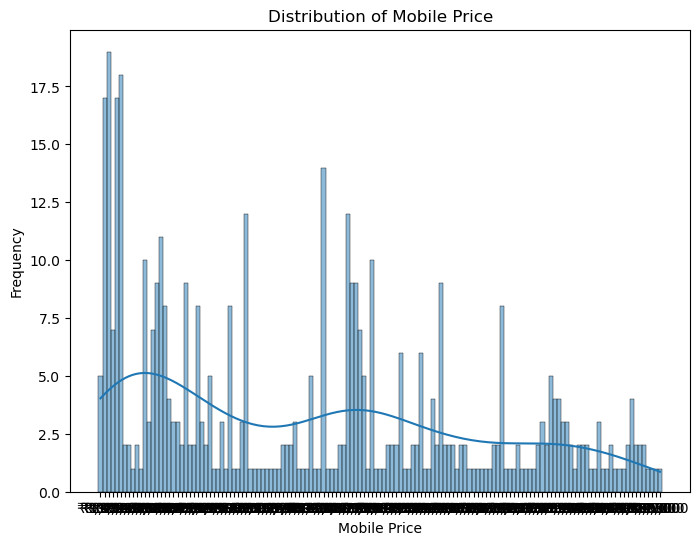

In [7]:
# Visualize distribution of target variable (mobile_price)
plt.figure(figsize=(8, 6))
sns.histplot(data['mobile_price'], bins=20, kde=True)
plt.xlabel('Mobile Price')
plt.ylabel('Frequency')
plt.title('Distribution of Mobile Price')
plt.show()

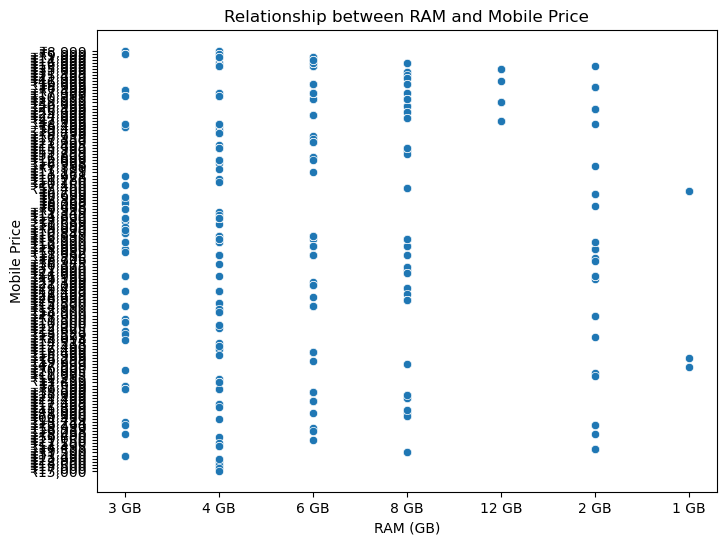

In [8]:
# Visualize relationship between RAM and mobile price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ram', y='mobile_price', data=data)
plt.xlabel('RAM (GB)')
plt.ylabel('Mobile Price')
plt.title('Relationship between RAM and Mobile Price')
plt.show()

In [9]:
# Cheking the Missing the values

data.isnull().sum()          # No missing values found, so no imputation needed

mobile_name      0
mobile_price     0
mobile_color     0
dual_sim         0
disp_size        0
resolution       0
os               0
num_cores        0
mp_speed         0
int_memory       0
ram              0
p_cam            0
f_cam            0
network          0
bluetooth        0
battery_power    0
mob_width        0
mob_height       0
mob_depth        0
mob_weight       0
dtype: int64

In [10]:
# Unique values in categorical columns

print(data['os'].unique())
print(data['num_cores'].unique())
print(data['network'].unique())
print(data['bluetooth'].unique())
print(data['dual_sim'].unique())

['Android 10' 'Android Pie 9.0' 'Android Pie 9' 'Android Oreo 8.1'
 'Android Pie 10' 'Android Nougat 7.1.1' 'Android Oreo 8.0'
 'Android Nougat 7.1.2' 'Android KitKat 4.4.2' 'Android Marshmallow 6.0.1'
 'Android Nougat 7.1' 'Android Marshmallow 6' 'Android Nougat 7'
 'Android Lollipop 5.4.1' 'Android Oreo 8.1.0' 'Android Oreo 8'
 'Android Lollipop 5.1' 'Android Lollipop 5.1.1']
['Octa Core' 'Quad Core' 'Single Core']
['4G VOLTE, 4G, 3G, 2G' '3G, 4G VOLTE, 2G' '3G, 4G VOLTE, 4G, 2G'
 '3G, 4G, 2G' '4G, 2G, 3G' '5G, 4G VOLTE, 4G, 3G, 2G' '4G VOLTE, 3G, 2G'
 '4G VOLTE, 3G' '4G VOLTE, 4G, 2G, 3G' '4G VOLTE, 5G' '3G, 4G VOLTE, 4G'
 '3G' '4G VOLTE' '3G, 4G VOLTE' '2G' '4G, 3G, 2G' '3G, 4G' '4G VOLTE, 4G']
['Yes']
['Dual Sim' 'Single Sim']


In [11]:
data.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g


In [12]:
data.columns

Index(['mobile_name', 'mobile_price', 'mobile_color', 'dual_sim', 'disp_size',
       'resolution', 'os', 'num_cores', 'mp_speed', 'int_memory', 'ram',
       'p_cam', 'f_cam', 'network', 'bluetooth', 'battery_power', 'mob_width',
       'mob_height', 'mob_depth', 'mob_weight'],
      dtype='object')

In [13]:
# List of columns to extract numeric values from
columns_to_extract = ['disp_size', 'mp_speed', 'int_memory', 'ram', 'p_cam', 'f_cam', 'battery_power', 'mob_width', 'mob_height', 'mob_depth', 'mob_weight']

# Loop through each column and extract numeric values
for column in columns_to_extract:
    data[column] = data[column].str.extract('(\d+\.?\d*)').astype(float)

In [15]:
# Drop the original 'resolution' column
data.drop('resolution', axis=1, inplace=True)

In [16]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['os', 'num_cores', 'network', 'bluetooth', 'dual_sim'], drop_first=True)

## Step 4: Feature Selection:

In [17]:
# Select features and target variable
X = data.drop(['mobile_name', 'mobile_price', 'mobile_color'], axis=1) # Features
y = data['mobile_price'] # Target variable

## Step 5: Model Building

In [18]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
y_train = y_train.str.replace('₹', '').str.replace(',', '').astype(float)
y_test = y_test.str.replace('₹', '').str.replace(',', '').astype(float)

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor 

RandomForestRegressor(random_state=42)

In [21]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Step 6: Model Evaluation

In [22]:
# Predict on the test set
y_pred = rf_regressor.predict(X_test)
y_pred

array([11287.167     ,  7524.        , 19775.81      , 13891.6325    ,
       12364.5025    , 16235.91      , 11905.0347619 , 14315.26261905,
       19296.49666667, 10401.5802381 , 11600.24      , 19249.        ,
       13071.46158333,  9797.73      , 13624.30303571, 11905.0347619 ,
       13851.465     , 15003.38333333, 39092.0025    ,  9095.66833333,
       32274.70492063, 17040.55      , 13914.49      , 29649.        ,
       18072.26      , 13215.01333333,  9867.28166667, 14092.06771429,
       16407.84952381, 13871.914     , 19678.28      , 28112.93      ,
       29573.3       , 18203.37      ,  9856.29666667,  8200.815     ,
       19141.49454545, 10930.155     , 13071.46158333, 12542.065     ,
       20775.51333333, 19600.27      , 22869.82      ,  9849.01      ,
       15003.38333333, 19437.55      ,  9995.29666667, 11403.05333333,
       16738.63      , 13267.66908333,  8955.99033333, 22869.82      ,
       16107.69571429, 16107.69571429, 11026.998     , 17290.81      ,
      

In [23]:
data.head()

,mobile_name,mobile_price,mobile_color,disp_size,mp_speed,int_memory,ram,p_cam,f_cam,battery_power,...,"network_4G VOLTE, 3G","network_4G VOLTE, 3G, 2G","network_4G VOLTE, 4G","network_4G VOLTE, 4G, 2G, 3G","network_4G VOLTE, 4G, 3G, 2G","network_4G VOLTE, 5G","network_4G, 2G, 3G","network_4G, 3G, 2G","network_5G, 4G VOLTE, 4G, 3G, 2G",dual_sim_Single Sim
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,16.56,2.0,32.0,3.0,12.0,5.0,5000.0,...,False,False,False,False,True,False,False,False,False,False
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,16.56,2.0,32.0,3.0,12.0,5.0,5000.0,...,False,False,False,False,True,False,False,False,False,False
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,16.56,2.0,64.0,4.0,12.0,5.0,5000.0,...,False,False,False,False,True,False,False,False,False,False
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,16.56,2.0,64.0,4.0,12.0,5.0,5000.0,...,False,False,False,False,True,False,False,False,False,False
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,16.51,2.0,128.0,4.0,48.0,16.0,5000.0,...,False,False,False,False,True,False,False,False,False,False


In [24]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4314603.849768155
